## Import of Libraries

In [1]:
import shap
import torch

import numpy as np
import torchvision.models as models
import matplotlib.pyplot as plt

from torchvision import transforms
from PIL import Image

device = torch.device("cuda" if torch.cuda.is_available() else "cpu") 

ModuleNotFoundError: No module named 'shap'

### Import of a Neural Network

In [2]:
model = models.alexnet(pretrained=True)

### Definition Logits prediction function: _predict_fn(X)[i]=$f_\theta(x)[i]$

In [3]:
def _predict_fn(X):
    X = torch.Tensor(X)
    if len(X.size()) == 3:
        X = X.unsqueeze(dim=0)
    if X.size()[3] == 3 or X.size()[3] == 1:
        X = X.permute(0, 3, 1, 2)

    return model(X)

### Example Images and Preprocessing

In [4]:
# Example Images
X, y = shap.datasets.imagenet50()

# Preprocessing
def preprocess_input(image : np.ndarray) -> np.ndarray:
    image = torch.Tensor(image)
    if len(image.size()) == 3:
        image = image.unsqueeze(dim=0)
    image = image.permute(0, 3, 1, 2)
    image /= 255
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
    preprocessed_input = (normalize(image)).permute(0, 2, 3, 1)
    return preprocessed_input

### Definition negative Energy: $-E_\theta(x)=\log(\sum_{y}\exp(f_\theta(x)[y]))$

In [5]:
def calculate_energy(output):
    energy = torch.logsumexp(output, dim=1)
    return energy

### Iteration over negative Energy $-E_\theta(x)$

In [6]:
energy=[]

for i in range(50):
    _predict_fn(X[i])
    energy.extend(calculate_energy( _predict_fn(preprocess_input(X[i]).to(device))).detach().numpy())

### Which image has the lowest Score?

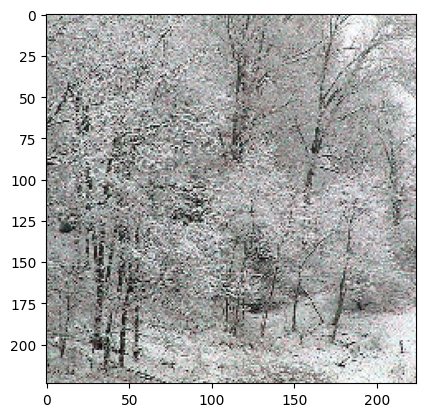

In [7]:
plt.imshow(X[np.where(np.array(energy)==np.min(energy))].squeeze())

### Which image has the highest Score?

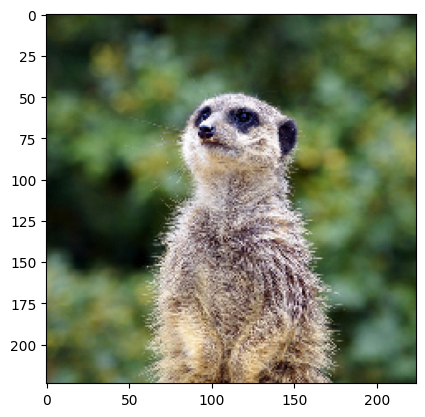

In [8]:
plt.imshow(X[np.where(np.array(energy)==np.max(energy))].squeeze())

In [25]:
max(energy)

37.464684

In [10]:
min(energy)

10.094953

### Import of new Images

In [11]:
im_path1 = 'examples/test.png'
im_path2 = 'examples/test1.jpg'
im_path3 = 'examples/recent_photograph_ML.jpg'
im_path4 = 'examples/test3.jpg'

In [12]:
im1 = np.array(Image.open(im_path1))[:,:,0:3]
im2 = np.array(Image.open(im_path2))[:,:,0:3]
im3 = np.array(Image.open(im_path3))[:,:,0:3]
im4 = np.array(Image.open(im_path4))[:,:,0:3]

### Plotting of Images

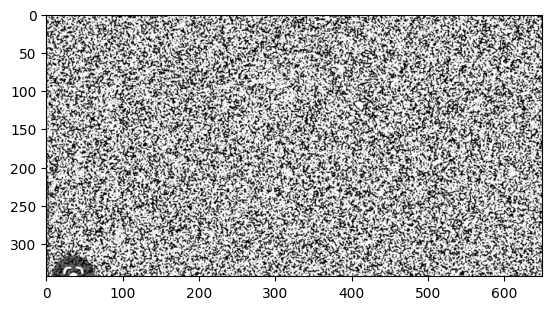

In [13]:
plt.imshow(
    Image.open(im_path1)
)

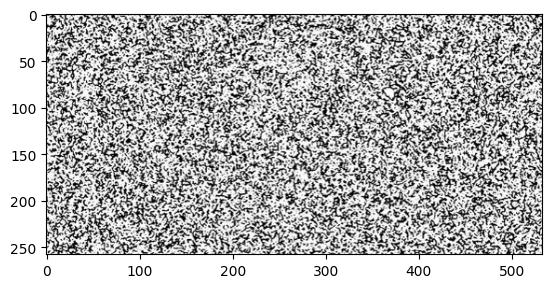

In [14]:
plt.imshow(
    Image.open(im_path2)
)

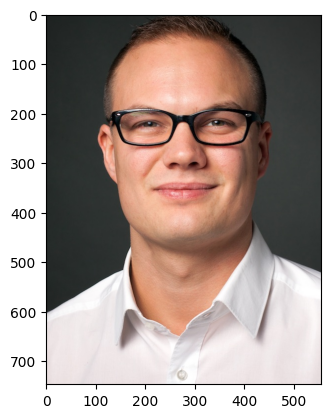

In [15]:
plt.imshow(
    Image.open(im_path3)
)

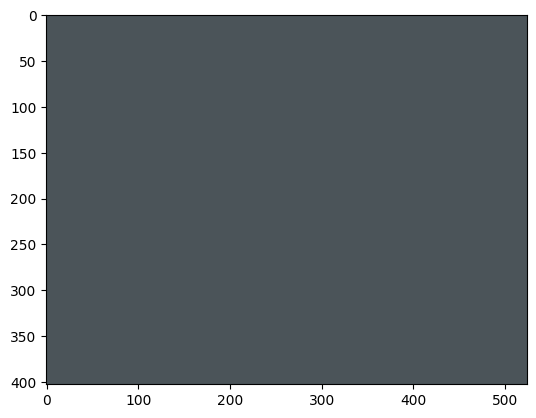

In [16]:
plt.imshow(
    Image.open(im_path4)
)

### Calculate Energy $-E_\theta(x)$

In [17]:
e1 = calculate_energy(_predict_fn( preprocess_input(im1)))
e2 = calculate_energy(_predict_fn( preprocess_input(im2)))
e3 = calculate_energy(_predict_fn( preprocess_input(im3)))
e4 = calculate_energy(_predict_fn( preprocess_input(im4)))

In [18]:
energy.extend(e1.detach().numpy())
energy.extend(e2.detach().numpy())
energy.extend(e3.detach().numpy())
energy.extend(e4.detach().numpy())

In [19]:
print(e1)
print(e2)
print(e3)
print(e4)


tensor([8.3064], grad_fn=<LogsumexpBackward0>)
tensor([8.6672], grad_fn=<LogsumexpBackward0>)
tensor([9.1901], grad_fn=<LogsumexpBackward0>)
tensor([7.1534], grad_fn=<LogsumexpBackward0>)


### Plot Histogram

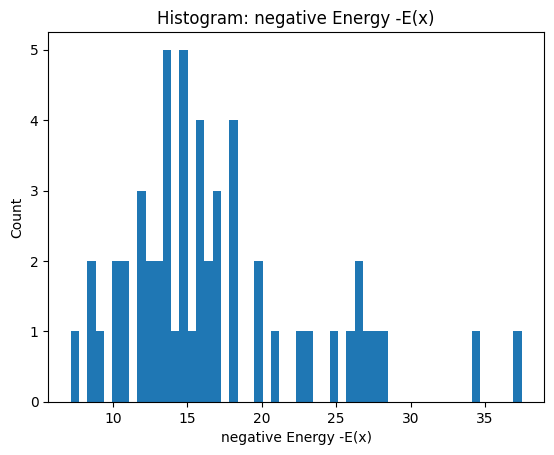

In [24]:
plt.hist(energy, bins=54)
plt.title('Histogram: negative Energy -E(x)')
plt.ylabel('Count')
plt.xlabel('negative Energy -E(x)')
plt.show()